# Data information
- 코로나바이러스감염증-19(COVID-19) 현황 누적 데이터 (2021.01.28)
- https://kdx.kr/data/view/25918

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Covid19InfState.csv

1. seq : 고유값
2. stateDt : 기준일
3. stateTime : 기준시간
4. decideCnt : 확진자 수
5. clearCnt : 격리해제 수
6. examCnt : 검사진행 수
7. deathCnt : 사망자 수
8. careCnt : 치료중 환자 수
9. resultNegCnt : 결과 음성 수
10. accExamCnt : 누적 검사 수
11. accExamCompCnt : 누적 검사 완료 수
12. accDefRate : 누적 확진률
13. createDt : 등록일(시분초)
14. updateDt : 수정일(시분초)

In [2]:
df_state = pd.read_csv("data_public/Covid19InfState.csv")

In [3]:
df_state.shape

(399, 14)

In [4]:
df_state.head(50)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,20200101,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.33,2020-02-03 12:21:56.56
1,2,20200202,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.49,NaN
2,3,20200203,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.17,2020-02-04 14:19:46.46
3,4,20200204,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.59,NaN
4,5,20200205,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.31,2020-02-05 9:43:16.16
5,6,20200205,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.40,2020-02-06 10:05:36.36
6,7,20200206,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06 9:09:49.49,2020-02-06 10:04:35.35
7,8,20200207,09:00,24.0,2.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 9:53:27.27,2020-02-07 11:44:30.30
8,9,20200207,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 17:20:45.45,NaN
9,10,20200208,09:00,24.0,2.0,620.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 10:09:34.34,NaN


In [5]:
df_state.tail(50)

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
349,350,20201211,00:00,40786.0,31157.0,77688.0,572.0,9057.0,3192739.0,3311213.0,3233525.0,1.261348,2020-12-11 09:33:06.394,NaN
350,351,20201212,00:00,41736.0,31493.0,86742.0,578.0,9665.0,3221386.0,3349864.0,3263122.0,1.279021,2020-12-12 09:19:01.382,NaN
351,352,20201213,00:00,42766.0,31814.0,90129.0,580.0,10372.0,3241700.0,3374595.0,3284466.0,1.302069,2020-12-13 09:48:21.971,NaN
352,353,20201214,00:00,43484.0,32102.0,89247.0,587.0,10795.0,3264308.0,3397039.0,3307792.0,1.314593,2020-12-14 09:38:10.035,NaN
353,354,20201215,00:00,44364.0,32559.0,93473.0,600.0,11205.0,3303383.0,3441220.0,3347747.0,1.325190,2020-12-15 09:34:38.398,NaN
354,355,20201216,00:00,45442.0,32947.0,94784.0,612.0,11883.0,3348543.0,3488769.0,3393985.0,1.338898,2020-12-16 09:37:53.572,NaN
355,356,20201217,00:00,46453.0,33610.0,99258.0,634.0,12209.0,3393129.0,3538840.0,3439582.0,1.350542,2020-12-17 09:34:22.89,NaN
356,357,20201218,00:00,47515.0,33982.0,110618.0,645.0,12888.0,3431662.0,3589795.0,3479177.0,1.365697,2020-12-18 09:36:49.66,NaN
357,358,20201219,00:00,48570.0,34334.0,126233.0,659.0,13577.0,3471444.0,3646247.0,3520014.0,1.379824,2020-12-19 09:39:06.64,NaN
358,359,20201219,00:00,48570.0,34334.0,126233.0,659.0,13577.0,3471444.0,3646247.0,3520014.0,1.379824,2020-12-19 10:32:55.469,NaN


- 확진자 수 X 기준일

In [6]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             399 non-null    int64  
 1   stateDt         399 non-null    int64  
 2   stateTime       399 non-null    object 
 3   decideCnt       397 non-null    float64
 4   clearCnt        396 non-null    float64
 5   examCnt         397 non-null    float64
 6   deathCnt        362 non-null    float64
 7   careCnt         339 non-null    float64
 8   resutlNegCnt    339 non-null    float64
 9   accExamCnt      339 non-null    float64
 10  accExamCompCnt  339 non-null    float64
 11  accDefRate      339 non-null    float64
 12  createDt        399 non-null    object 
 13  updateDt        26 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 43.8+ KB


In [7]:
# 기준일을 datetime 데이터로 변환 (int -> str -> datetime)
import datetime
df_state.stateDt = df_state.stateDt.apply(lambda x:str(x)[:4]+'-'+str(x)[4:6]+'-'+str(x)[6:])
df_state.stateDt = df_state.stateDt.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   seq             399 non-null    int64         
 1   stateDt         399 non-null    datetime64[ns]
 2   stateTime       399 non-null    object        
 3   decideCnt       397 non-null    float64       
 4   clearCnt        396 non-null    float64       
 5   examCnt         397 non-null    float64       
 6   deathCnt        362 non-null    float64       
 7   careCnt         339 non-null    float64       
 8   resutlNegCnt    339 non-null    float64       
 9   accExamCnt      339 non-null    float64       
 10  accExamCompCnt  339 non-null    float64       
 11  accDefRate      339 non-null    float64       
 12  createDt        399 non-null    object        
 13  updateDt        26 non-null     object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memo

In [9]:
#중복값 확인
df_state.duplicated

duplicate = df_state[df_state.duplicated()]
  
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt


In [10]:
import warnings
warnings.filterwarnings('ignore')

- 'decideCnt' 는 누적확진자임을 알 수 있음

<AxesSubplot:xlabel='stateDt', ylabel='Count'>

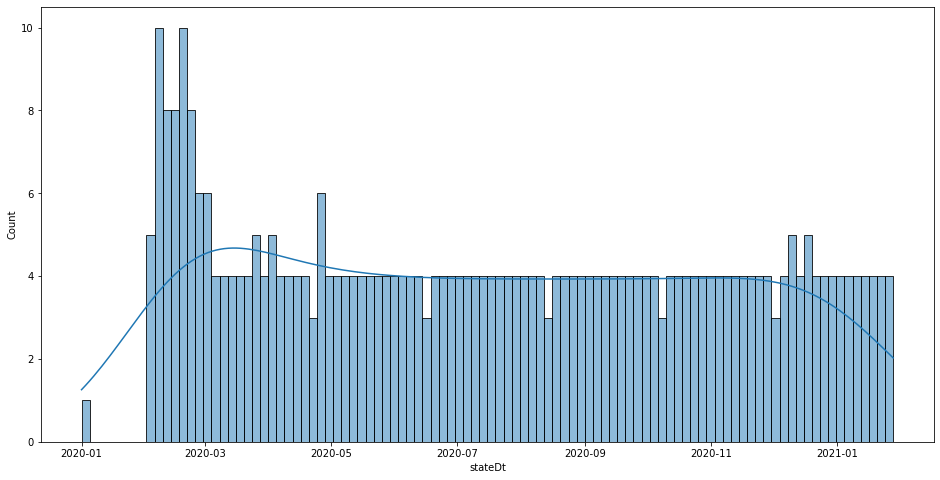

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(x='stateDt', data=df_state, kde=True, bins=100, ax=ax)

- 누적 말고 일별 확진자 추이를 보고싶은데..

In [12]:
stateDt_vc = df_state.stateDt.value_counts()

In [13]:
stateDt_vc.head(31)

2020-02-08    5
2020-04-25    3
2020-02-18    3
2020-02-21    3
2020-02-19    2
2020-02-22    2
2020-02-07    2
2020-04-02    2
2020-02-12    2
2020-02-10    2
2020-02-27    2
2020-03-24    2
2020-02-24    2
2020-03-01    2
2020-02-20    2
2020-02-14    2
2020-02-17    2
2020-02-15    2
2020-12-08    2
2020-02-05    2
2020-02-11    2
2020-02-29    2
2020-02-26    2
2020-12-19    2
2020-02-25    2
2020-02-16    2
2020-02-23    2
2020-02-28    2
2020-02-13    2
2020-02-09    2
2020-07-14    1
Name: stateDt, dtype: int64

In [14]:
df_stateDt_vc = pd.DataFrame(stateDt_vc)

In [15]:
df_stateDt_vc.head()

,stateDt
2020-02-08,5
2020-04-25,3
2020-02-18,3
2020-02-21,3
2020-02-19,2


- 중복으로 등록된 날들이 많아, 마지막 등록 시간을 제외하고는 삭제하자.

In [16]:
#중복 등록된 카운트가 1 초과인 경우를 추출하여 li로 등록
li = []
for i in range(len(df_stateDt_vc)):
    if df_stateDt_vc.iloc[i, 0] > 1:
        li.append(df_stateDt_vc.index[i])

In [17]:
len(li)

30

In [18]:
#dt 변환
df_state.createDt = df_state.createDt.apply(lambda x:str(x))
df_state.createDt = df_state.createDt.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [19]:
type(df_state.loc[0]['createDt'].hour)

int

In [20]:
df_state2 = df_state.set_index("stateDt")
df_state2.head()

,seq,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
stateDt,,,,,,,,,,,,,
2020-01-01,1,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
2020-02-02,2,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2020-02-03,3,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
2020-02-04,4,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
2020-02-05,5,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [21]:
#li 리스트에서 creatDt 시간이 17시 이전인 행들만 추출하여 sq에 seq 값을 저장
sq = []
for l in range(len(li)):
    for i in range(len(df_state2.loc[li[l]]['createDt'])):
        if df_state2.loc[li[l]]['createDt'][i].hour < 17:
            sq.append(df_state2.seq[df_state2['createDt'] == df_state2.loc[li[l]]['createDt'][i]])

In [22]:
df_state2.head()

,seq,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
stateDt,,,,,,,,,,,,,
2020-01-01,1,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
2020-02-02,2,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2020-02-03,3,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
2020-02-04,4,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
2020-02-05,5,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [23]:
#df.set_index([pd.Index([1, 2, 3, 4]), 'year'])
df_state2 = df_state2.reset_index(drop=False)
df_state2.head()

,stateDt,seq,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,2020-01-01,1,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
1,2020-02-02,2,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2,2020-02-03,3,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
3,2020-02-04,4,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
4,2020-02-05,5,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [24]:
df_state2 = df_state2.set_index("seq")

In [25]:
df_state2.head()

,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
seq,,,,,,,,,,,,,
1,2020-01-01,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
4,2020-02-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [26]:
for s in sq:
#     print(s[0])
    df_state2.drop(index=[s[0]], inplace=True)

In [27]:
df_state2 = df_state2.reset_index(drop=False)
df_state2.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,2020-01-01,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
1,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
3,4,2020-02-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
4,5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [28]:
df_state.shape

(399, 14)

In [29]:
df_state.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1,2020-01-01,18:00,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31 17:47:33.330,2020-02-03 12:21:56.56
1,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
2,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
3,4,2020-02-04,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 21:26:59.590,NaN
4,5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16


In [30]:
df_state2.shape

(356, 14)

In [31]:
df_state2.stateDt.value_counts()

2020-02-05    2
2020-02-21    2
2020-02-08    2
2020-10-29    1
2020-11-29    1
2020-04-29    1
2020-03-29    1
2020-02-27    1
2021-01-16    1
2020-12-16    1
2020-11-15    1
2020-09-28    1
2020-10-15    1
2020-09-14    1
2020-08-14    1
2020-05-30    1
2020-06-13    1
2020-05-13    1
2020-04-12    1
2020-03-12    1
2020-02-10    1
2020-12-30    1
2020-07-14    1
2020-03-13    1
2020-08-28    1
2020-06-16    1
2020-04-01    1
2020-03-01    1
2021-01-19    1
2020-11-18    1
2020-10-18    1
2020-09-17    1
2020-08-17    1
2020-07-17    1
2020-05-16    1
2020-07-31    1
2020-04-15    1
2020-03-15    1
2020-02-13    1
2021-01-02    1
2020-12-02    1
2020-11-01    1
2020-10-01    1
2020-08-31    1
2020-06-30    1
2020-06-27    1
2020-07-28    1
2020-10-09    1
2020-07-25    1
2020-06-24    1
2020-05-24    1
2020-04-23    1
2020-03-23    1
2021-01-10    1
2020-12-10    1
2020-11-09    1
2020-09-08    1
2020-09-25    1
2020-08-08    1
2020-07-08    1
2020-06-07    1
2020-05-07    1
2020-04-

- 2020년 5일, 8일, 21일은 아직도 두 개씩 남아 있다. (index 4, 8, 17 제거 필요)

In [32]:
df_state2[df_state2.stateDt=="2020-02-05"]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
4,5,2020-02-05,09:00,18.0,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04 23:56:31.310,2020-02-05 9:43:16.16
5,6,2020-02-05,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.400,2020-02-06 10:05:36.36


In [33]:
df_state2[df_state2.stateDt=="2020-02-08"]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
8,13,2020-02-08,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 17:01:12.120,NaN
9,14,2020-02-08,16:00,24.0,2.0,939.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-08 17:01:34.340,NaN


In [34]:
df_state2[df_state2.stateDt=="2020-02-21"]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
17,41,2020-02-21,16:00,204.0,17.0,3180.0,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-21 17:12:33.330,NaN
18,42,2020-02-21,16:00,204.0,17.0,3180.0,1.0,NaN,NaN,NaN,NaN,NaN,2020-02-21 17:13:21.210,NaN


In [35]:
df_state2.drop([4, 8, 17], inplace=True)

In [36]:
df_state2.shape

(353, 14)

- decideCnt(t)-decideCnt(t-1) : dailyCnt 로 생성
- 그 전에 Nan값 처리부터.. (다행히 2개밖에 없다)

In [37]:
df_state2.isnull().sum()

seq                 0
stateDt             0
stateTime           0
decideCnt           2
clearCnt            2
examCnt             2
deathCnt           13
careCnt            25
resutlNegCnt       25
accExamCnt         25
accExamCompCnt     25
accDefRate         25
createDt            0
updateDt          332
dtype: int64

In [38]:
df_state3 = df_state2.dropna(subset=["decideCnt"])

In [39]:
df_state3.reset_index(inplace=True, drop=True)

In [40]:
df_state3.shape

(351, 14)

In [41]:
df_state3.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN
1,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46
2,6,2020-02-05,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.400,2020-02-06 10:05:36.36
3,7,2020-02-06,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06 09:09:49.490,2020-02-06 10:04:35.35
4,9,2020-02-07,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 17:20:45.450,NaN


In [42]:
dailyCnt = pd.Series(0, index=range(0,len(df_state3)))

In [43]:
for i in range(1, len(df_state3)):
    dailyCnt.iloc[i] = (df_state3.decideCnt.iloc[i] - df_state3.decideCnt.iloc[i-1])
print(i)

350


In [44]:
dailyCnt[:5]

0     0.0
1    13.0
2     4.0
3     4.0
4     1.0
dtype: float64

In [45]:
df_state3.tail()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
346,396,2021-01-24,00:00,75084.0,62530.0,135765.0,1349.0,11205.0,5143500.0,5354349.0,5218584.0,1.438781,2021-01-24 09:31:28.637,NaN
347,397,2021-01-25,00:00,75521.0,62956.0,134549.0,1360.0,11205.0,5166016.0,5376086.0,5241537.0,1.440818,2021-01-25 09:38:09.015,NaN
348,398,2021-01-26,00:00,75875.0,64793.0,138624.0,1371.0,9711.0,5208269.0,5422768.0,5284144.0,1.435900,2021-01-26 09:41:15.083,NaN
349,399,2021-01-27,00:00,76429.0,65478.0,138427.0,1378.0,9573.0,5254391.0,5469247.0,5330820.0,1.433719,2021-01-27 09:45:38.773,NaN
350,400,2021-01-28,00:00,76926.0,66016.0,139424.0,1386.0,9524.0,5305839.0,5522189.0,5382765.0,1.429117,2021-01-28 09:38:09.595,NaN


In [46]:
dailyCnt[-5:]

346    392.0
347    437.0
348    354.0
349    554.0
350    497.0
dtype: float64

In [47]:
df_state3["dailyCnt"] = dailyCnt

In [48]:
df_state3.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt,dailyCnt
0,2,2020-02-02,09:00,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2020-02-03 12:22:49.490,NaN,0.0
1,3,2020-02-03,09:00,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03 14:41:17.170,2020-02-04 14:19:46.46,13.0
2,6,2020-02-05,19:00,19.0,1.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05 20:05:40.400,2020-02-06 10:05:36.36,4.0
3,7,2020-02-06,09:00,23.0,1.0,169.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06 09:09:49.490,2020-02-06 10:04:35.35,4.0
4,9,2020-02-07,16:00,24.0,2.0,327.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-07 17:20:45.450,NaN,1.0


- stateDt X dailyCnt

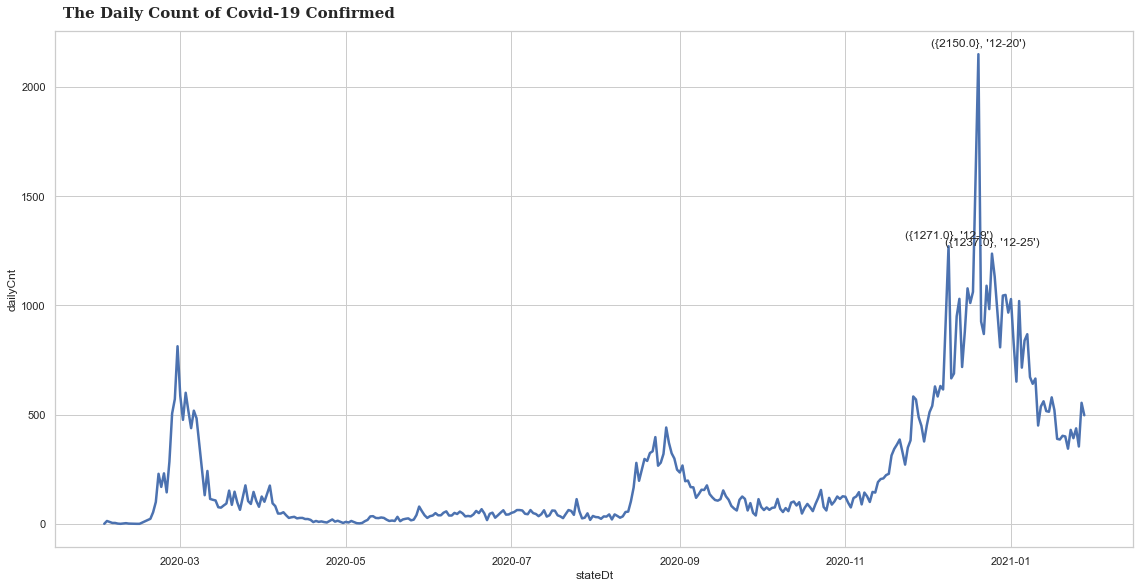

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
sns.set_theme(style="whitegrid")
sns.color_palette("Paired")

for i in df_state3['dailyCnt'].index:
    if (df_state3['dailyCnt'][i] > 1200):
        ax.annotate(({df_state3['dailyCnt'][i]}, ("{}-{}".format(df_state3['stateDt'][i].month, df_state3['stateDt'][i].day))),
                   xy=(df_state3['stateDt'][i], df_state3['dailyCnt'][i] + 50),
                   va = 'center', ha='center')

sns.lineplot(x='stateDt', y='dailyCnt', data=df_state3, ax=ax, linewidth=2.5)

fig.text(0.06, 1, 'The Daily Count of Covid-19 Confirmed ', fontsize=15, fontweight='bold', fontfamily='serif')

plt.tight_layout()
plt.show()

<AxesSubplot:>

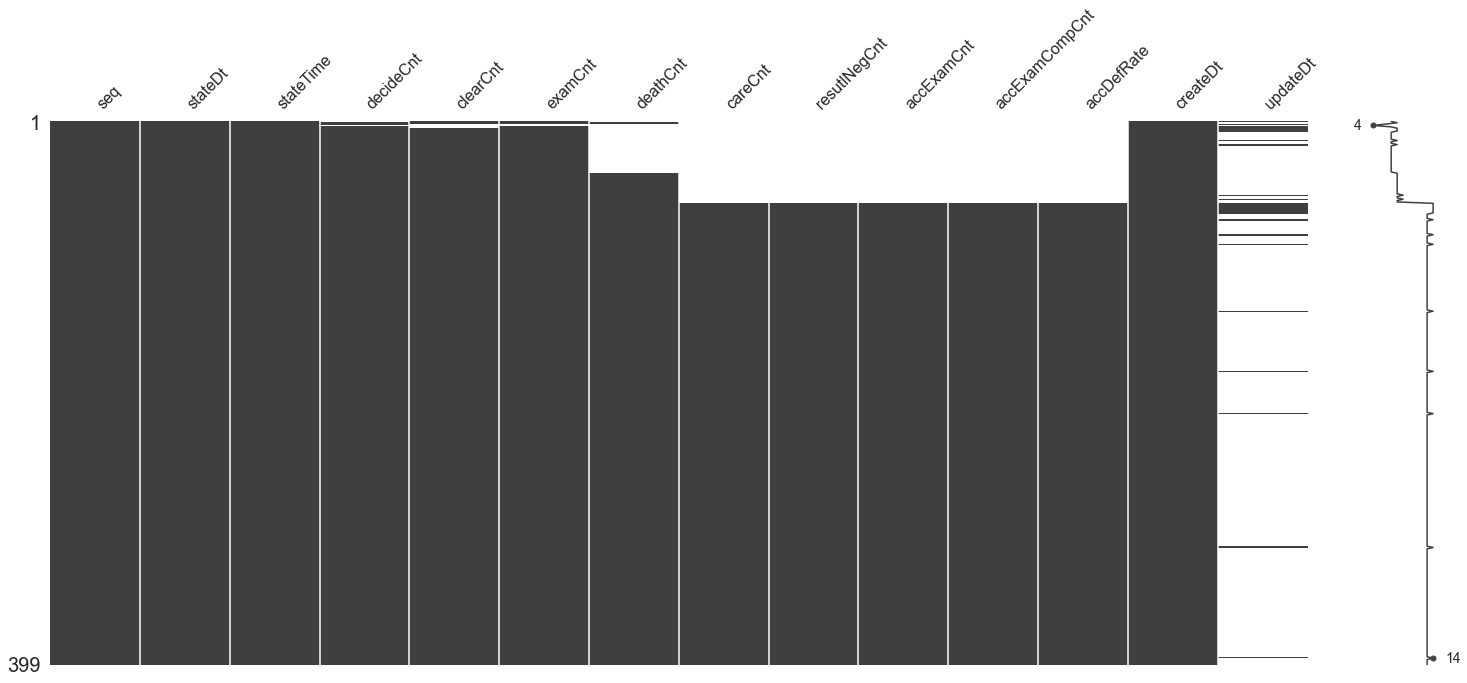

In [50]:
msno.matrix(df_state)

In [69]:
df_state3.iloc[200:205]

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt,dailyCnt
200,245,2020-08-29,00:00,19400.0,14765.0,54046.0,321.0,4314.0,1835883.0,1909329.0,1855283.0,1.045663,2020-08-29 09:56:02.115,NaN,323.0
201,246,2020-08-30,00:00,19699.0,14903.0,58021.0,323.0,4473.0,1846450.0,1924170.0,1866149.0,1.055596,2020-08-30 09:37:35.210,NaN,299.0
202,247,2020-08-31,00:00,19947.0,14973.0,57876.0,324.0,4650.0,1859866.0,1937689.0,1879813.0,1.061116,2020-08-31 09:32:30.212,NaN,248.0
203,248,2020-09-01,00:00,20182.0,15198.0,56743.0,324.0,4660.0,1882155.0,1959080.0,1902337.0,1.060906,2020-09-01 09:32:28.222,NaN,235.0
204,249,2020-09-02,00:00,20449.0,15356.0,56748.0,326.0,4767.0,1903098.0,1980295.0,1923547.0,1.063088,2020-09-02 10:20:17.634,NaN,267.0


1. (dailyCnt : 일별확진자 수) /(examCnt : 검사진행 수) = 일별 검사 대비 확진율?

In [76]:
print("날짜 : {}\n확진율 : {:.4f}".format(df_state3.stateDt[202], (df_state3.dailyCnt[202]/df_state3.examCnt[202])))

날짜 : 2020-08-31 00:00:00
확진율 : 0.0043


In [80]:
df_state3["dailyDefRate"] = df_state3.dailyCnt/df_state3.examCnt

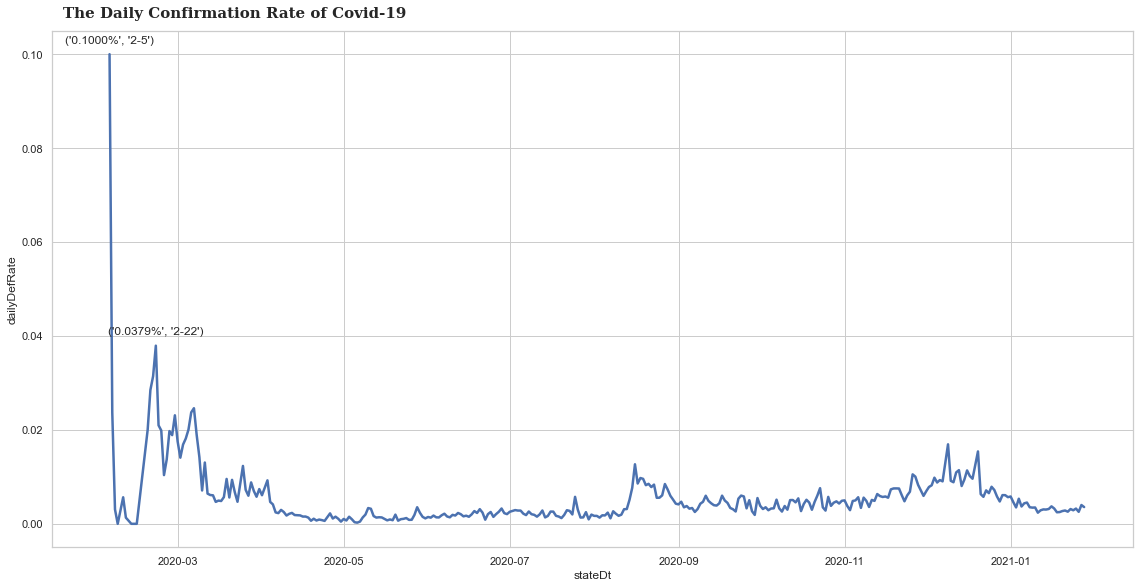

In [165]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set_theme(style="whitegrid")
sns.color_palette("Paired")

for i in df_state3['dailyDefRate'].index:
    if (df_state3['dailyDefRate'][i] > 0.035):
        ax.annotate((f"{df_state3['dailyDefRate'][i]:.4f}%", ("{}-{}".format(df_state3['stateDt'][i].month, df_state3['stateDt'][i].day))),
                   xy=(df_state3['stateDt'][i], df_state3['dailyDefRate'][i] + 0.003),
                   va = 'center', ha='center')

fig.text(0.06, 1, 'The Daily Confirmation Rate of Covid-19', fontsize=15, fontweight='bold', fontfamily='serif')

sns.lineplot(x='stateDt', y='dailyDefRate', data=df_state3, ax=ax, linewidth=2.5)

plt.tight_layout()
plt.show()

2. ((accExamCompCnt : 누적 검사 완료 수) - (resultNegCnt : 결과 음성 수))/(accExamCompCnt : 누적 검사 완료 수) = (accDefRate : 누적 확진률) ?


In [79]:
print("날짜 : {}\n누적 확진율 : {:.6f}".format(df_state3.stateDt[202], ((df_state3.accExamCompCnt[202]-df_state3.resutlNegCnt[202])/df_state3.accExamCompCnt[202])))

날짜 : 2020-08-31 00:00:00
누적 확진율 : 0.010611


---

## Covid19GenAgeCaseInf.csv

1. seq : 고유값
2. gubun : 구분
3. confCase : 확진자
4. confCaseRate : 확진률
5. death : 사망자
6. deathRate : 사망률
7. criticalRate : 치명률
8. createDt : 등록일시(시분초)
9. updateDt : 수정일시(시분초)

In [189]:
df_info = pd.read_csv("data_public/Covid19GenAgeCaseInf.csv")

In [190]:
df_info.shape

(3169, 9)

In [191]:
df_info.describe()

,seq,confCase,confCaseRate,death,deathRate,criticalRate,updateDt
count,3169.000000,3169.000000,3169.000000,2305.000000,3160.000000,2305.000000,0.0
mean,3007.995267,4520.028716,18.176403,109.282863,18.228247,4.569796,NaN
std,1912.130774,5871.965656,16.342331,132.468454,21.387116,7.126969,NaN
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.030000,NaN
25%,1366.000000,1177.000000,5.740000,10.000000,0.000000,0.260000,NaN
50%,2862.000000,2576.000000,13.100000,77.000000,5.180000,1.550000,NaN
75%,4655.000000,5346.000000,19.270000,152.000000,46.890000,3.040000,NaN
max,6491.000000,38948.000000,60.100000,770.000000,56.770000,26.680000,NaN


In [192]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   seq           3169 non-null   int64  
 1   gubun         3169 non-null   object 
 2   confCase      3169 non-null   int64  
 3   confCaseRate  3169 non-null   float64
 4   death         2305 non-null   float64
 5   deathRate     3160 non-null   float64
 6   criticalRate  2305 non-null   float64
 7   createDt      3169 non-null   object 
 8   updateDt      0 non-null      float64
dtypes: float64(5), int64(2), object(2)
memory usage: 222.9+ KB


In [193]:
df_info.head()

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02 19:02:48.48,NaN
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02 19:02:48.48,NaN
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02 19:02:48.48,NaN
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02 19:02:48.48,NaN


In [194]:
df_info.tail(22)

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
3147,6448,남성,37208,49.04,681.0,49.67,1.83,2021-01-26 14:24:07.451,NaN
3148,6449,여성,38667,50.96,690.0,50.33,1.78,2021-01-26 14:24:07.451,NaN
3149,6450,80 이상,3777,4.98,766.0,55.87,20.28,2021-01-26 14:24:07.451,NaN
3150,6451,70-79,5866,7.73,381.0,27.79,6.50,2021-01-26 14:24:07.451,NaN
3151,6452,60-69,11932,15.73,163.0,11.89,1.37,2021-01-26 14:24:07.451,NaN
3152,6453,50-59,14271,18.81,45.0,3.28,0.32,2021-01-26 14:24:07.451,NaN
3153,6454,40-49,10863,14.32,10.0,0.73,0.09,2021-01-26 14:24:07.452,NaN
3154,6455,30-39,9694,12.78,6.0,0.44,0.06,2021-01-26 14:24:07.452,NaN
3155,6456,20-29,11677,15.39,NaN,0.00,NaN,2021-01-26 14:24:07.452,NaN
3156,6457,10-19,4952,6.53,NaN,0.00,NaN,2021-01-26 14:24:07.452,NaN


- 자세히 보니까, 그냥 남성~ 0-9 까지 그냥 행으로 업데이트 한 시트였다.(도대체 데이터 정리를 왜 이렇게 하는거지..)

In [195]:
df_info.replace("0-11", "0-9", inplace=True)

In [196]:
df_info.gubun.value_counts()

0-9      289
20-29    288
50-59    288
여성       288
60-69    288
40-49    288
남성       288
30-39    288
70-79    288
10-19    288
80 이상    288
Name: gubun, dtype: int64

In [197]:
df_info[20:25]

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
20,21,10-19,544,5.27,NaN,NaN,NaN,2020-04-07 19:32:08.08,NaN
21,22,0-9,126,1.22,NaN,NaN,NaN,2020-04-07 19:32:08.08,NaN
22,23,0-9,1,1.00,1.0,1.0,1.00,2020-04-07 20:10:50.50,NaN
23,24,남성,4163,40.09,106.0,53.0,2.55,2020-04-08 10:55:38.38,NaN
24,25,여성,6221,59.91,94.0,47.0,1.51,2020-04-08 10:55:38.38,NaN


- 잘 못 들어간 데이터 인 것 같다. 삭제하자.

In [198]:
df_info.drop([22], inplace=True)

In [199]:
df_info.reset_index(inplace=True, drop=True)
df_info[20:25]

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
20,21,10-19,544,5.27,NaN,NaN,NaN,2020-04-07 19:32:08.08,NaN
21,22,0-9,126,1.22,NaN,NaN,NaN,2020-04-07 19:32:08.08,NaN
22,24,남성,4163,40.09,106.0,53.0,2.55,2020-04-08 10:55:38.38,NaN
23,25,여성,6221,59.91,94.0,47.0,1.51,2020-04-08 10:55:38.38,NaN
24,26,80 이상,470,4.53,96.0,48.0,20.43,2020-04-08 10:55:38.38,NaN


In [201]:
len(df_info) / 11

288.0

In [205]:
df_info[0:34]

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
1,2,여성,5881,60.10,80.0,49.38,1.36,2020-04-02 19:02:48.48,NaN
2,3,80 이상,442,4.52,82.0,50.62,18.55,2020-04-02 19:02:48.48,NaN
3,4,70-79,651,6.65,46.0,28.40,7.07,2020-04-02 19:02:48.48,NaN
4,5,60-69,1235,12.62,22.0,13.58,1.78,2020-04-02 19:02:48.48,NaN
5,6,50-59,1851,18.91,10.0,6.17,0.54,2020-04-02 19:02:48.48,NaN
6,7,40-49,1312,13.41,1.0,0.62,0.08,2020-04-02 19:02:48.48,NaN
7,8,30-39,1012,10.34,1.0,0.62,0.10,2020-04-02 19:02:48.48,NaN
8,9,20-29,2656,27.14,NaN,NaN,NaN,2020-04-02 19:02:48.48,NaN
9,10,10-19,515,5.26,NaN,NaN,NaN,2020-04-02 19:02:48.48,NaN


- 288번의 업데이트가 이뤄졌음을 알 수 있다. 그럼, 몇번의 주기로 업데이트를 했을까?

In [207]:
df_info[df_info["gubun"]=="남성"]["createDt"]

0        2020-04-02 19:02:48.48
11       2020-04-07 19:32:08.08
22       2020-04-08 10:55:38.38
33       2020-04-08 10:56:57.57
44       2020-04-08 10:58:36.36
55       2020-04-08 11:33:25.25
66       2020-04-08 11:34:40.40
77       2020-04-09 10:23:55.55
88       2020-04-10 10:17:34.34
99       2020-04-11 10:29:51.51
110      2020-04-12 10:22:13.13
121      2020-04-13 10:22:30.30
132      2020-04-14 10:24:23.23
143      2020-04-15 15:44:18.18
154      2020-04-16 11:05:01.01
165      2020-04-16 16:10:09.09
176      2020-04-17 10:35:19.19
187      2020-04-18 10:45:43.43
198      2020-04-19 10:54:13.13
209      2020-04-19 11:07:32.32
220      2020-04-20 10:28:12.12
231      2020-04-21 10:16:42.42
242      2020-04-22 10:21:54.54
253      2020-04-23 10:12:14.14
264      2020-04-24 10:12:54.54
275      2020-04-25 10:40:12.12
286      2020-04-26 10:14:44.44
297      2020-04-27 10:14:06.06
308     2020-04-28 10:24:17.932
319     2020-04-29 10:27:13.131
330     2020-04-30 10:14:04.188
341     

- 4월 8일에 도대체 무슨일이..

<AxesSubplot:>

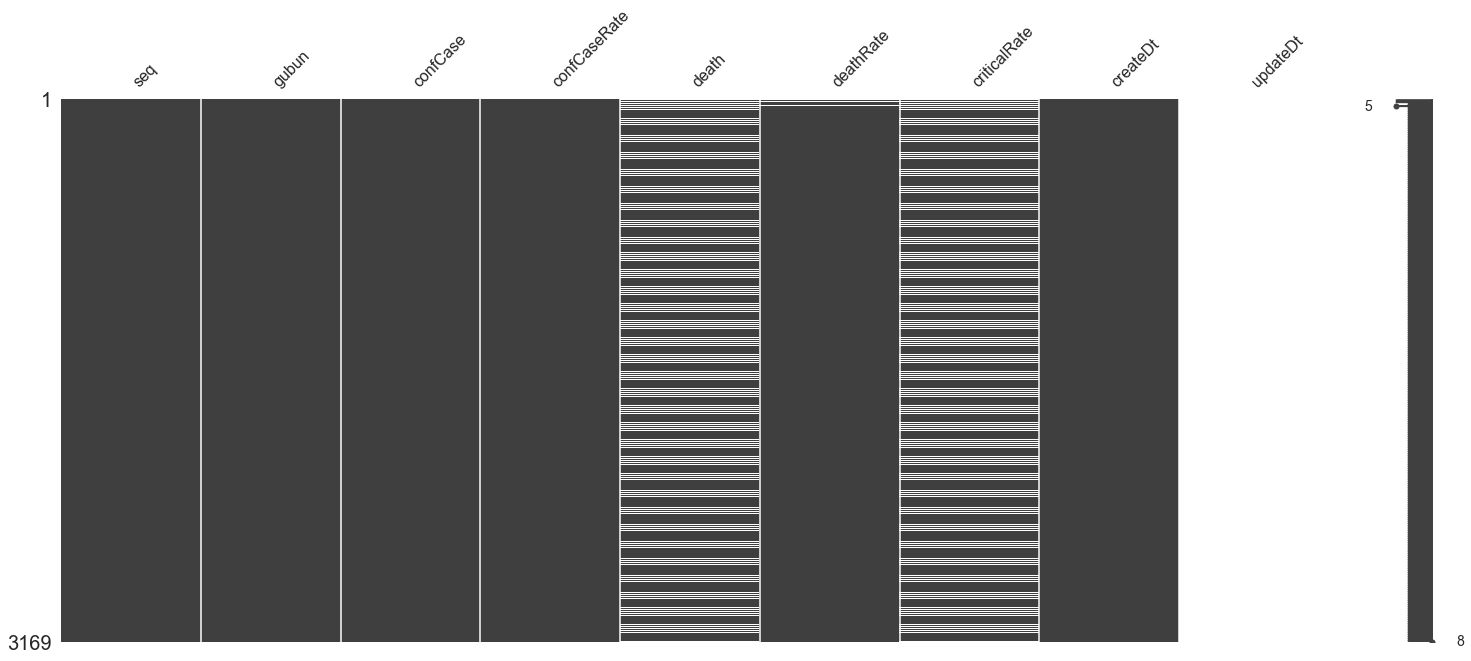

In [57]:
msno.matrix(df_info)

In [292]:
df_info[df_info['gubun']=="남성"].head(30)

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
11,12,남성,4138,40.05,101.0,52.60,2.44,2020-04-07 19:32:08.08,NaN
22,24,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:55:38.38,NaN
33,35,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:56:57.57,NaN
44,46,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:58:36.36,NaN
55,58,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:33:25.25,NaN
66,69,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:34:40.40,NaN
77,80,남성,4185,40.15,107.0,52.45,2.56,2020-04-09 10:23:55.55,NaN
88,91,남성,4200,40.19,109.0,52.40,2.60,2020-04-10 10:17:34.34,NaN
99,102,남성,4215,40.22,111.0,52.61,2.63,2020-04-11 10:29:51.51,NaN


In [219]:
df_info.drop([3124], inplace=True)

In [290]:
np.diff(df_info[df_info['gubun']=="여성"].confCase)[:20]

array([312,  28,   0,   0,   0,   0,  17,  12,  15,  18,  11,  14,  17,
        16,   0,   8,  11,   4,   0,   8])

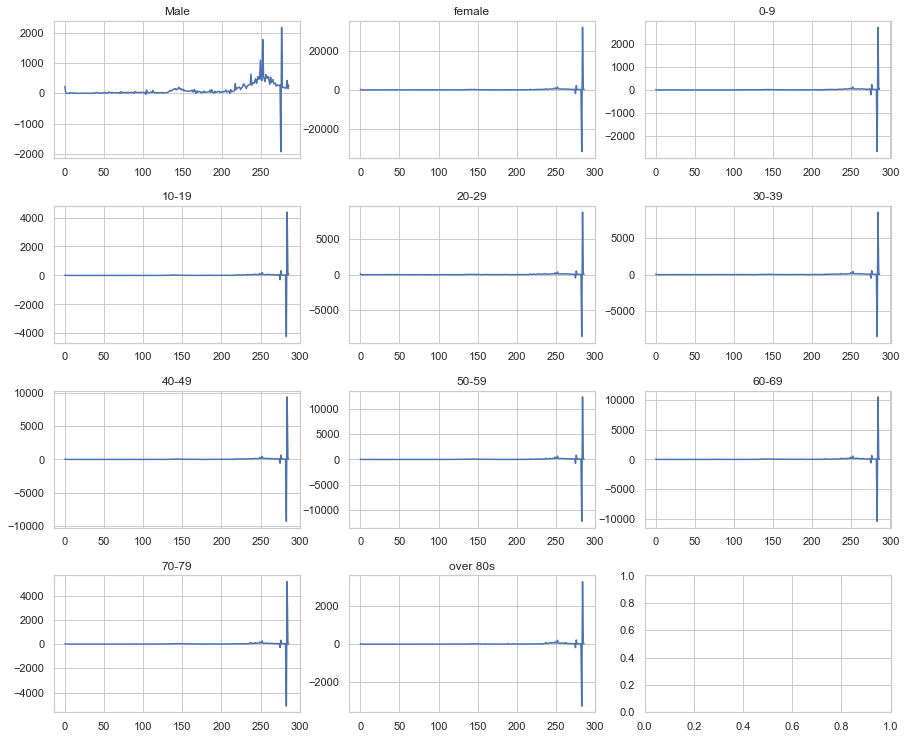

In [287]:
fig, ax = plt.subplots(4, 3, figsize=(15,12))
sns.set_theme(style="whitegrid")
sns.color_palette("Paired")

ax[0, 0].set_title("Male")
sns.lineplot(ax=ax[0, 0], x=range(0, 286), y=np.diff(df_info[df_info['gubun']=="남성"].confCase))

ax[0, 1].set_title("female")
sns.lineplot(ax=ax[0, 1], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="여성"].confCase))

ax[0, 2].set_title("0-9")
sns.lineplot(ax=ax[0, 2], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="0-9"].confCase))

ax[1, 0].set_title("10-19")
sns.lineplot(ax=ax[1, 0], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="10-19"].confCase))

ax[1, 1].set_title("20-29")
sns.lineplot(ax=ax[1, 1], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="20-29"].confCase))

ax[1, 2].set_title("30-39")
sns.lineplot(ax=ax[1, 2], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="30-39"].confCase))

ax[2, 0].set_title("40-49")
sns.lineplot(ax=ax[2, 0], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="40-49"].confCase))

ax[2, 1].set_title("50-59")
sns.lineplot(ax=ax[2, 1], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="50-59"].confCase))

ax[2, 2].set_title("60-69")
sns.lineplot(ax=ax[2, 2], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="60-69"].confCase))

ax[3, 0].set_title("70-79")
sns.lineplot(ax=ax[3, 0], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="70-79"].confCase))

ax[3, 1].set_title("over 80s")
sns.lineplot(ax=ax[3, 1], x=range(0, 287), y=np.diff(df_info[df_info['gubun']=="80 이상"].confCase))

fig.suptitle('', fontsize=18, fontweight='bold', fontfamily='serif')
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

- 남성만 자세히 살펴보자.

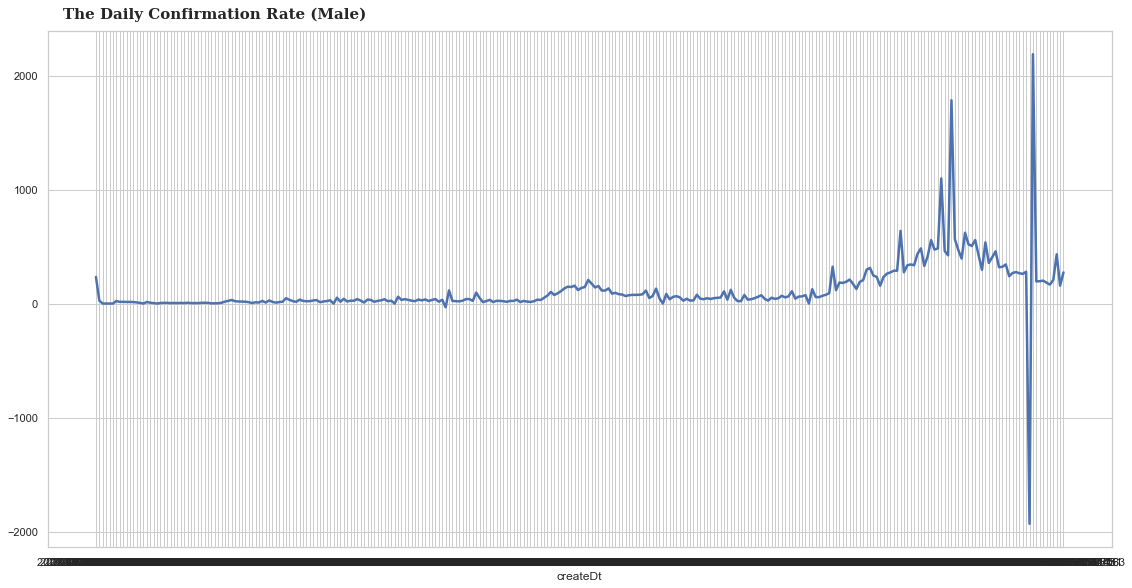

In [317]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set_theme(style="whitegrid")
sns.color_palette("Paired")
fig.text(0.06, 1, 'The Daily Confirmation Rate (Male)', fontsize=15, fontweight='bold', fontfamily='serif')

sns.lineplot(x=df_info[df_info['gubun']=="남성"].createDt[1:], y=np.diff(df_info[df_info['gubun']=="남성"].confCase), ax=ax, linewidth=2.5)

plt.tight_layout()
plt.show()

In [329]:
df_info[df_info['gubun']=="남성"][:10]

,seq,gubun,confCase,confCaseRate,death,deathRate,criticalRate,createDt,updateDt
0,1,남성,3905,39.90,82.0,50.62,2.10,2020-04-02 19:02:48.48,NaN
11,12,남성,4138,40.05,101.0,52.60,2.44,2020-04-07 19:32:08.08,NaN
22,24,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:55:38.38,NaN
33,35,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:56:57.57,NaN
44,46,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 10:58:36.36,NaN
55,58,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:33:25.25,NaN
66,69,남성,4163,40.09,106.0,53.00,2.55,2020-04-08 11:34:40.40,NaN
77,80,남성,4185,40.15,107.0,52.45,2.56,2020-04-09 10:23:55.55,NaN
88,91,남성,4200,40.19,109.0,52.40,2.60,2020-04-10 10:17:34.34,NaN
99,102,남성,4215,40.22,111.0,52.61,2.63,2020-04-11 10:29:51.51,NaN


In [344]:
np.diff(df_info[df_info['gubun']=="남성"].confCase)[:10]

array([233,  25,   0,   0,   0,   0,  22,  15,  15,  14])

In [367]:
print(df_info[df_info['gubun']=="남성"].iloc[252]['createDt'])

2020-12-22 14:11:34.46


In [373]:
for i in range(0, len(df_info[df_info['gubun']=="남성"])-1):
    if np.diff(df_info[df_info['gubun']=="남성"].confCase)[i] > 1500:
        print("미분값 : {}, 날짜 : {}".format(np.diff(df_info[df_info['gubun']=="남성"].confCase)[i], df_info[df_info['gubun']=="남성"].iloc[i].createDt))
    elif np.diff(df_info[df_info['gubun']=="남성"].confCase)[i] < -1000:
        print("미분값 : {}, 날짜 : {}".format(np.diff(df_info[df_info['gubun']=="남성"].confCase)[i], df_info[df_info['gubun']=="남성"].iloc[i].createDt))

미분값 : 1783, 날짜 : 2020-12-22 14:11:34.46
미분값 : -1932, 날짜 : 2021-01-16 14:35:01.77
미분값 : 2187, 날짜 : 2021-01-17 14:15:35.756


---

## data lab sample data
- https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET0300001

1. 데이터 설명 : 전국 지역(우편번호), 업종별 매출집계 데이터

- 집계기간 : 1개월

- 집계차원 : 카드결제연월, 가맹점 지역(우편번호), 연령, 성별

- 집계항목 : 카드시장/비씨카드의 카드대출 및 현금서비스 이용금액 (단위 : 원)

- 세분화 기준 : 연령대(20:20-24세, 25:25-29세, 30:30-34세, 35:35-39세, 40:40-44세, 45:45-49세, 50:50-54세, 55:55-59세, 60:60-64세, 65:65-69세, 70: 70세이상), 성별 (남:M, 여F)

In [64]:
df_sample = pd.read_csv("./lab_sample.csv", encoding="euc-kr")

In [65]:
df_sample.head()

,기준년월,신우편번호,연령대코드,성별코드,신용판매순매출금액,단기카드대출순매출금액,리볼빙신용판매매출금액,리볼빙단기카드대출금액,즉시불순매출금액
0,201701,0177*,30,F,1124908,0,0,0,1197043
1,201701,0248*,45,F,728113,0,0,0,427410
2,201701,4182*,30,F,381640,0,0,0,224977
3,201701,4200*,40,M,1157903,0,0,0,545855
4,201701,4109*,35,F,496910,0,0,0,250223


In [66]:
df_sample.shape

(50, 9)

### data information